# Finding Dominant Colour (1) K-means Clustering Method

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1285, 984, 3)


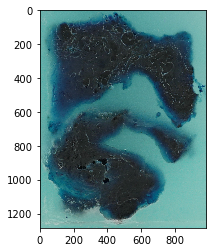

In [143]:
image = cv2.imread('/Users/gary/opt/anaconda3/sample_image_cropped.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

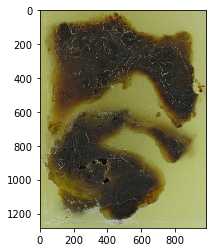

In [144]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [112]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [113]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [114]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([147.64733373, 148.78241462,  77.03436189]),
 array([47.39387246, 42.68829583, 34.67257419]),
 array([118.76224429, 104.86363031,  36.50126608]),
 array([174.28675026, 180.94192157, 114.60346618]),
 array([82.50589951, 66.15600616, 34.74725275])]

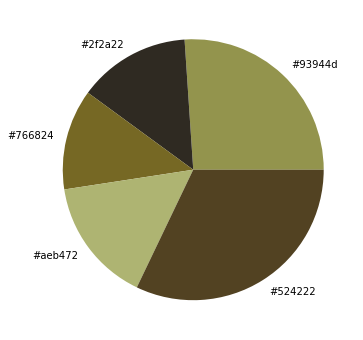

In [146]:
get_colors(get_image('/Users/gary/opt/anaconda3/sample_image_cropped.jpg'), 5, True)

# Finding Dominant Colour (2) PIL Method

In [78]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('/Users/gary/opt/anaconda3/sample_image_cropped.jpg')
im = im.resize((150, 150))      # resize the image to reduce processing time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters
cluster centres:
 [[ 81.43385781  65.14714452  34.51019814]
 [ 48.09167705  43.55380141  35.69616397]
 [118.1312456  103.66889514  35.03589022]
 [174.10823171 180.74457995 114.35331978]
 [147.43082876 148.4869397   76.21896163]]
most frequent is [48.09167705 43.55380141 35.69616397] (#302b23)


# Finding Dominant Colour (3) ColorThief Method

In [80]:
from colorthief import ColorThief
color_thief = ColorThief('/Users/gary/opt/anaconda3/sample_image_cropped.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
print('dominant color:', dominant_color)
# find color pallete
palette = color_thief.get_palette(color_count=6)
print('cluster centres:', palette)

dominant color: (64, 55, 34)
cluster centres: [(171, 177, 109), (56, 49, 35), (144, 141, 68), (125, 119, 49), (108, 88, 29), (131, 133, 127)]


#  Classification by Colour

In [139]:
IMAGE_DIRECTORY = '/Users/gary/opt/anaconda3/images'
COLORS = {
    'BLACK': [41, 41, 33],
    'DARK_BROWN': [47, 43, 34],
    'TAN': [152, 124, 45],
    'BLUE': [40, 55, 64],
    'RED': [92, 37, 35]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

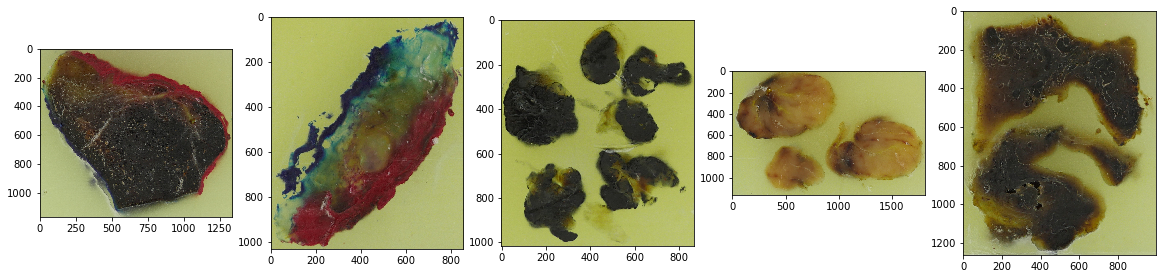

In [82]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [103]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 5): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [104]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

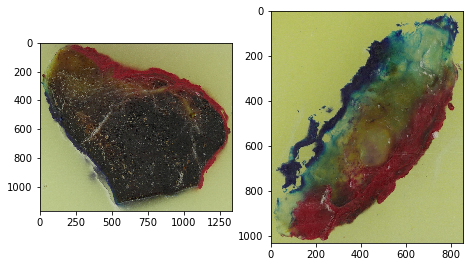

In [121]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 10, 5)

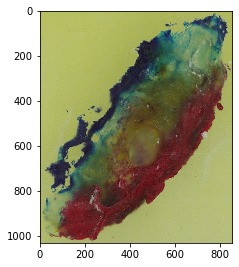

In [127]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 10, 5)

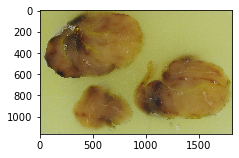

In [140]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['TAN'], 10, 5)

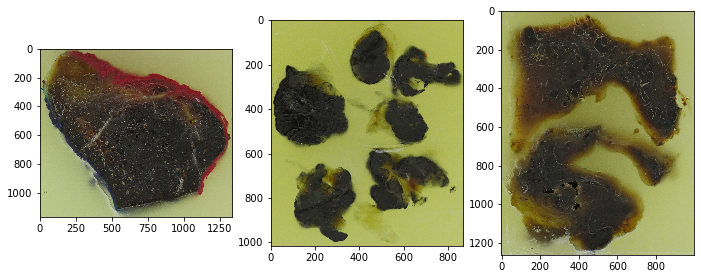

In [141]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['DARK_BROWN'], 5, 3)

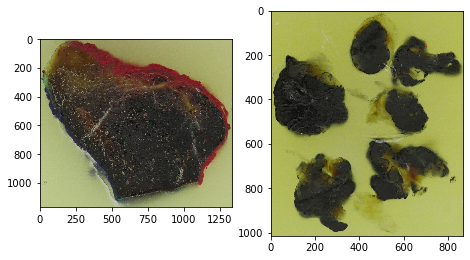

In [142]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLACK'], 5, 3)

# Preprocessing - GrabCut

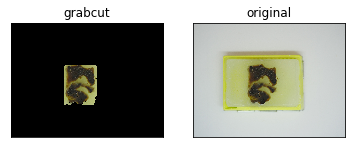

In [49]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img  = cv2.imread('/Users/gary/opt/anaconda3/sample_image.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1600,1300,1000,1200)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread('/Users/gary/opt/anaconda3/sample_image.jpg'),
cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])

plt.show()

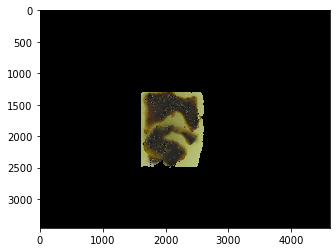

In [63]:
plt.imshow(img)
plt.savefig('/Users/gary/opt/anaconda3/grabcut.jpg')